In [ ]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from numpy import savetxt
import numpy as np

data = pd.read_csv('labeled_raw_clustering demographic data.csv')
data = data.values

In [ ]:
# This code gives us the probability of each age + gender in each class
label = np.unique(data[:,8]).tolist()
gender = np.unique(data[:,7]).tolist()
age = np.unique(data[:,6]).tolist()

for l in label:
  sample = []
  for g in gender:
    for a in age:
      samples = [1 for i in range(len(data)) if (data[i,8]==l and data[i,7]==g and data[i,6]==a)]
      #print(l, g, a, np.round(len(samples)/np.sum(data[:,8]==l),2))
      sample.append([l, g, a, np.round(len(samples)/np.sum(data[:,8]==l),2)])
  savetxt('pred_by_clustering_'+str(l)+'.csv', np.array(sample), delimiter=',')

**Download and Preprocesing the dataset**

In [ ]:

import pandas as pd
from numpy import savetxt

"""
data = pd.read_csv('processed data.csv')
data = data.values

# this code is for handling missing values
#data.replace('?', 'NaN', inplace=True)
col_mode = data.mode()
for i in data.columns:
  temp = col_mode[i][0]
  for j in data.index:
    if data.loc[j,i] == 'Unknown':
      data.loc[j,i] = temp

savetxt('processed data_modified.csv', data, delimiter=',', fmt='%s')
"""
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COVID-19 USA/raw data_new.csv')
data.head(5)

,abdom_yn,abxchest_yn,acuterespdistress_yn,age_group,chills_yn,cough_yn,death_yn,diarrhea_yn,fever_yn,sfever_yn,...,mechvent_yn,medcond_yn,myalgia_yn,nauseavomit_yn,pna_yn,race,runnose_yn,gender,sob_yn,sthroat_yn
0,No,No,No,40 - 49 Years,Yes,Yes,No,Yes,No,No,...,No,Yes,Yes,Yes,No,White,No,Male,No,Yes
1,No,No,No,40 - 49 Years,Yes,Yes,No,No,Yes,Yes,...,No,No,Yes,No,No,White,No,Male,No,Yes
2,No,Yes,No,40 - 49 Years,Yes,Yes,No,Yes,Yes,Yes,...,No,Yes,Yes,No,No,White,Yes,Male,Yes,Yes
3,No,No,No,40 - 49 Years,Yes,No,No,Yes,No,No,...,No,Yes,Yes,No,No,White,No,Male,No,No
4,No,No,No,40 - 49 Years,Yes,Yes,No,No,Yes,Yes,...,No,Yes,Yes,No,No,White,No,Male,Yes,Yes


In [ ]:
## Code for splitting a phrase separated by comma
# race = []
# ethnicity = []
# rawdata = data['race_ethnicity_combined']
# for i in range(len(data['race_ethnicity_combined'])):
#   race.append(rawdata[i].split(', ')[0])
#   ethnicity.append(rawdata[i].split(', ')[1])

# savetxt('ethnicity.csv', np.array(ethnicity), delimiter=',', fmt='%s')  

In [ ]:
import pandas as pd
import numpy as np

from urllib.request import urlopen
from pgmpy.models import BayesianNetwork
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.estimators import ExpectationMaximization as EM
from pgmpy.estimators import ParameterEstimator
from pgmpy.inference import VariableElimination

data = data.rename({"abdom_yn":"A","abxchest_yn":"B","acuterespdistress_yn":"C","age_group":"D","chills_yn":"E","cough_yn":"F","death_yn":"G","diarrhea_yn":"H","fever_yn":"I","sfever_yn":"J","hc_work_yn":"K","headache_yn":"L","hosp_yn":"M","icu_yn":"N","mechvent_yn":"O","medcond_yn":"P","myalgia_yn":"Q","nauseavomit_yn":"R","pna_yn":"S","race":"T","runnose_yn":"U","gender":"V","sob_yn":"W","sthroat_yn":"X"}, axis='columns')
data.head()


### **Structure Learning begins here** 
###### Given a set of data samples, estimate a DAG that captures the dependencies between the variables
---
Score-based structure learning: Hill-Climb algorithm


In [ ]:
from pgmpy.estimators import HillClimbSearch, PC
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.factors.discrete.CPD import TabularCPD

k2 = K2Score(data)
bic = BicScore(data)

hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BicScore(data))
print(best_model.edges())
print(k2.score(best_model))
print(bic.score(best_model))

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('B', 'S'), ('B', 'M'), ('B', 'P'), ('B', 'N'), ('B', 'H'), ('B', 'R'), ('B', 'V'), ('C', 'B'), ('C', 'M'), ('C', 'N'), ('C', 'O'), ('C', 'S'), ('D', 'G'), ('D', 'X'), ('D', 'F'), ('D', 'T'), ('D', 'I'), ('D', 'K'), ('D', 'Q'), ('D', 'P'), ('D', 'E'), ('E', 'J'), ('E', 'Q'), ('E', 'I'), ('E', 'F'), ('E', 'W'), ('E', 'X'), ('E', 'U'), ('E', 'A'), ('F', 'J'), ('F', 'U'), ('F', 'I'), ('F', 'X'), ('H', 'A'), ('H', 'E'), ('H', 'Q'), ('H', 'P'), ('H', 'L'), ('H', 'F'), ('H', 'D'), ('H', 'W'), ('I', 'U'), ('I', 'J'), ('L', 'X'), ('L', 'U'), ('L', 'F'), ('L', 'J'), ('L', 'A'), ('L', 'W'), ('L', 'I'), ('L', 'Q'), ('L', 'G'), ('L', 'D'), ('L', 'E'), ('M', 'N'), ('M', 'P'), ('M', 'D'), ('M', 'S'), ('M', 'G'), ('M', 'W'), ('M', 'U'), ('M', 'V'), ('M', 'O'), ('M', 'R'), ('M', 'L'), ('M', 'H'), ('N', 'O'), ('N', 'S'), ('N', 'V'), ('O', 'G'), ('P', 'W'), ('P', 'T'), ('P', 'U'), ('Q', 'F'), ('Q', 'W'), ('Q', 'J'), ('Q', 'X'), ('Q', 'A'), ('Q', 'I'), ('Q', 'U'), ('R', 'H'), ('R', 'A'), ('R', 'E'), ('R

Constraint-based structure learning: PC with variants algorithm

In [ ]:
est = PC(data)
#estimated_model = est.estimate(variant='orig', max_cond_vars=4)
estimated_model = est.estimate(variant='stable', ci_test='chi_square', max_cond_vars=17)
print(estimated_model.edges())

  0%|          | 0/17 [00:00<?, ?it/s]

Directed Acyclic Graph

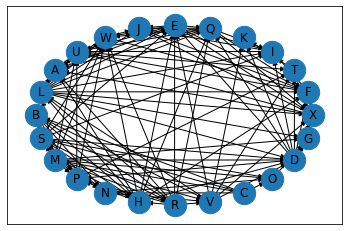

24 109


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([ ('B', 'S'), ('B', 'M'), ('B', 'P'), ('B', 'N'), ('B', 'H'), ('B', 'R'), ('B', 'V'), ('C', 'B'), ('C', 'M'), ('C', 'N'), ('C', 'O'), ('C', 'S'), ('D', 'G'), ('D', 'X'), ('D', 'F'), ('D', 'T'), ('D', 'I'), ('D', 'K'), ('D', 'Q'), ('D', 'P'), ('D', 'E'), ('E', 'J'), ('E', 'Q'), ('E', 'I'), ('E', 'F'), ('E', 'W'), ('E', 'X'), ('E', 'U'), ('E', 'A'), ('F', 'J'), ('F', 'U'), ('F', 'I'), ('F', 'X'), ('H', 'A'), ('H', 'E'), ('H', 'Q'), ('H', 'P'), ('H', 'L'), ('H', 'F'), ('H', 'D'), ('H', 'W'), ('I', 'U'), ('I', 'J'), ('L', 'X'), ('L', 'U'), ('L', 'F'), ('L', 'J'), ('L', 'A'), ('L', 'W'), ('L', 'I'), ('L', 'Q'), ('L', 'G'), ('L', 'D'), ('L', 'E'), ('M', 'N'), ('M', 'P'), ('M', 'D'), ('M', 'S'), ('M', 'G'), ('M', 'W'), ('M', 'U'), ('M', 'V'), ('M', 'O'), ('M', 'R'), ('M', 'L'), ('M', 'H'), ('N', 'O'), ('N', 'S'), ('N', 'V'), ('O', 'G'), ('P', 'W'), ('P', 'T'), ('P', 'U'), ('Q', 'F'), ('Q', 'W'), ('Q', 'J'), ('Q', 'X'), ('Q', 'A'), ('Q', 'I'), ('Q', 'U'), ('R', 'H'), ('R', 'A'), ('R', 'E'), ('R', 'Q'), ('R', 'L'), ('R', 'W'), ('R', 'V'), ('R', 'P'), ('S', 'W'), ('S', 'I'), ('S', 'R'), ('S', 'E'), ('S', 'D'), ('S', 'H'), ('S', 'O'), ('T', 'K'), ('U', 'T'), ('V', 'K'), ('V', 'D'), ('V', 'T'), ('V', 'L'), ('V', 'X'), ('V', 'E'), ('W', 'A'), ('W', 'J'), ('W', 'F'), ('X', 'U'), ('X', 'J'), ('X', 'A') ])
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black')
nx.draw_networkx_labels(G, pos)
plt.show()
#print (nx.info(G))
print(len(G.nodes()), len(G.edges()))

### **Parameter Learning begins here**
###### Parameter learning is the task to estimate the values of the conditional probability distributions (CPDs)
---
Get parameters from Bayesian Network

In [ ]:
model = BayesianNetwork([('B', 'S'), ('B', 'M'), ('B', 'P'), ('B', 'N'), ('B', 'H'), ('B', 'R'), ('B', 'V'), ('C', 'B'), ('C', 'M'), ('C', 'N'), ('C', 'O'), ('C', 'S'), ('D', 'G'), ('D', 'X'), ('D', 'F'), ('D', 'T'), ('D', 'I'), ('D', 'K'), ('D', 'Q'), ('D', 'P'), ('D', 'E'), ('E', 'J'), ('E', 'Q'), ('E', 'I'), ('E', 'F'), ('E', 'W'), ('E', 'X'), ('E', 'U'), ('E', 'A'), ('F', 'J'), ('F', 'U'), ('F', 'I'), ('F', 'X'), ('H', 'A'), ('H', 'E'), ('H', 'Q'), ('H', 'P'), ('H', 'L'), ('H', 'F'), ('H', 'D'), ('H', 'W'), ('I', 'U'), ('I', 'J'), ('L', 'X'), ('L', 'U'), ('L', 'F'), ('L', 'J'), ('L', 'A'), ('L', 'W'), ('L', 'I'), ('L', 'Q'), ('L', 'G'), ('L', 'D'), ('L', 'E'), ('M', 'N'), ('M', 'P'), ('M', 'D'), ('M', 'S'), ('M', 'G'), ('M', 'W'), ('M', 'U'), ('M', 'V'), ('M', 'O'), ('M', 'R'), ('M', 'L'), ('M', 'H'), ('N', 'O'), ('N', 'S'), ('N', 'V'), ('O', 'G'), ('P', 'W'), ('P', 'T'), ('P', 'U'), ('Q', 'F'), ('Q', 'W'), ('Q', 'J'), ('Q', 'X'), ('Q', 'A'), ('Q', 'I'), ('Q', 'U'), ('R', 'H'), ('R', 'A'), ('R', 'E'), ('R', 'Q'), ('R', 'L'), ('R', 'W'), ('R', 'V'), ('R', 'P'), ('S', 'W'), ('S', 'I'), ('S', 'R'), ('S', 'E'), ('S', 'D'), ('S', 'H'), ('S', 'O'), ('T', 'K'), ('U', 'T'), ('V', 'K'), ('V', 'D'), ('V', 'T'), ('V', 'L'), ('V', 'X'), ('V', 'E'), ('W', 'A'), ('W', 'J'), ('W', 'F'), ('X', 'U'), ('X', 'J'), ('X', 'A')])
#model.fit(val_data, estimator=MaximumLikelihoodEstimator)
estimator = BayesianEstimator(model, data)
estimator.get_parameters(prior_type='BDeu', equivalent_sample_size=576)

[<TabularCPD representing P(B:2 | C:2) at 0x7f0e70ace970>,
 <TabularCPD representing P(S:2 | B:2, C:2, M:2, N:2) at 0x7f0e70a58cd0>,
 <TabularCPD representing P(M:2 | B:2, C:2) at 0x7f0e70a61100>,
 <TabularCPD representing P(P:2 | B:2, D:9, H:2, M:2, R:2) at 0x7f0e70ac4370>,
 <TabularCPD representing P(N:2 | B:2, C:2, M:2) at 0x7f0e6612ec10>,
 <TabularCPD representing P(H:2 | B:2, M:2, R:2, S:2) at 0x7f0e661f71c0>,
 <TabularCPD representing P(R:2 | B:2, M:2, S:2) at 0x7f0e70a661c0>,
 <TabularCPD representing P(V:2 | B:2, M:2, N:2, R:2) at 0x7f0e70a615b0>,
 <TabularCPD representing P(C:2) at 0x7f0e70a588e0>,
 <TabularCPD representing P(O:2 | C:2, M:2, N:2, S:2) at 0x7f0e70a66640>,
 <TabularCPD representing P(D:9 | H:2, L:2, M:2, S:2, V:2) at 0x7f0e6612ef10>,
 <TabularCPD representing P(G:2 | D:9, L:2, M:2, O:2) at 0x7f0e65ffe1f0>,
 <TabularCPD representing P(X:2 | D:9, E:2, F:2, L:2, Q:2, V:2) at 0x7f0e70a61580>,
 <TabularCPD representing P(F:2 | D:9, E:2, H:2, L:2, Q:2, W:2) at 0x7f0e7

Get CPDs from Bayesian Network

In [ ]:
model.fit(data, estimator=BayesianEstimator, prior_type="BDeu", equivalent_sample_size=576)
#print(estimator.estimate_cpd('G', prior_type='BDeu', equivalent_sample_size=10))
for cpd in model.get_cpds():
  backup = TabularCPD._truncate_strtable
  TabularCPD._truncate_strtable = lambda self, x: x  
  probs = cpd.values.tolist()
  probs = np.array(probs)
  all_row = []
  if(cpd.variable=='C'):
    pass
  else:
    for m in range(len(probs)):
      mcat = np.concatenate((probs[m]), axis=None)
      all_row.append(mcat.tolist())
    cpd = TabularCPD(cpd.variable, cpd.variable_card, np.round(all_row,2), evidence=cpd.variables[1:], evidence_card=cpd.cardinality[1:],
                     state_names={'A': ['No', 'Yes'], 'B': ['No', 'Yes'], 'C': ['No', 'Yes'], 'D': ['0 - 9 Years', '10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years', '50 - 59 Years', '60 - 69 Years', '70 - 79 Years', '80+ Years'], 
                                 'E': ['No', 'Yes'], 'F': ['No', 'Yes'], 'G': ['No', 'Yes'], 'H': ['No', 'Yes'], 'I': ['No', 'Yes'], 'J': ['No', 'Yes'], 'K': ['No', 'Yes'], 'L': ['No', 'Yes'], 'M': ['No', 'Yes'], 'N': ['No', 'Yes'],
                                 'O': ['No', 'Yes'], 'P': ['No', 'Yes'], 'Q': ['No', 'Yes'], 'R': ['No', 'Yes'], 'S': ['No', 'Yes'], 'T': ['American Indian/Alaska Native', 'Asian', 'Black', 'Multiple/Other', 'Native Hawaiian/Other Pacific Islander', 'White'], 'U': ['No', 'Yes'], 'V': ['Female', 'Male'], 
                                 'W': ['No', 'Yes'], 'X': ['No', 'Yes']})
    print(cpd)
    TabularCPD._truncate_strtable = backup

+--------+-------+--------+
| C      | C(No) | C(Yes) |
+--------+-------+--------+
| B(No)  | 0.97  | 0.23   |
+--------+-------+--------+
| B(Yes) | 0.03  | 0.77   |
+--------+-------+--------+
+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| B      | B(No) | B(No)  | B(No)  | B(No)  | B(No)  | B(No)  | B(No)  | B(No)  | B(Yes) | B(Yes) | B(Yes) | B(Yes) | B(Yes) | B(Yes) | B(Yes) | B(Yes) |
+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| C      | C(No) | C(No)  | C(No)  | C(No)  | C(Yes) | C(Yes) | C(Yes) | C(Yes) | C(No)  | C(No)  | C(No)  | C(No)  | C(Yes) | C(Yes) | C(Yes) | C(Yes) |
+--------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| M      | M(No) | M(No)  | M(Yes)

In [ ]:
# Getting all the local independencies in the network.
model.local_independencies(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R'])

Inference

In [ ]:
infer = VariableElimination(model)
q = infer.query(variables=['R'], evidence={'J': 'No', 'D': 'Yes', 'E': 'No'})
print(q)